<a href="https://colab.research.google.com/github/beckii0930/LLM/blob/main/esm2_binding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
# files.upload()  # Upload kaggle.json
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive


In [18]:
!ls drive/MyDrive/Colab\ Notebooks/subset_binding_data.csv

 chembert_BBBP.ipynb    esm2_binding.ipynb
'Copy of Yibei.ipynb'   subset_binding_data.csv


In [22]:
import pandas as pd

# Load full dataset
df = pd.read_csv("drive/MyDrive/Colab Notebooks/subset_binding_data.csv")


In [24]:
df.head()# df_filtered = df.dropna(subset=["aa_seq", "ddG_ML"])

# # Step 3: Rename and extract relevant columns
# df_model_input = df_filtered[["aa_seq", "ddG_ML"]].copy()
# df_model_input = df_model_input.rename(columns={
#     "aa_seq": "sequence",
#     "ddG_ML": "ddg"
# })


,name,dna_seq,log10_K50_t,log10_K50_t_95CI_high,log10_K50_t_95CI_low,log10_K50_t_95CI,fitting_error_t,log10_K50unfolded_t,deltaG_t,deltaG_t_95CI_high,...,aa_seq,mut_type,WT_name,WT_cluster,log10_K50_trypsin_ML,log10_K50_chymotrypsin_ML,dG_ML,ddG_ML,Stabilizing_mut,pair_name
0,2LCL.pdb_insA51,TCTGCGGGTGGTTCCGCTGGTGGTGCGACTCCATATCCGGGCGACA...,-1.064787,-1.006837,-1.147820,0.140983,0.046020,-1.235202,-0.424914,-0.213474,...,ATPYPGDKVIITEGAFEGFQAIFTEPDGEARSMLLLNLINKEIKHS...,insA51,2LCL.pdb,131,-1.0647869107579346,-2.243871736716254,-0.3603994746424429,-1.0710246962721528,False,NaN
1,2RRT.pdb_V56K,TCTGCGTCTGAAGAAGAAATCCGTGAAGCGTTCCGTGTTTTCGACA...,-0.375956,-0.371520,-0.382949,0.011429,0.054913,-0.867813,0.432072,0.440799,...,SEEEIREAFRVFDKDGNGYISAADLRHVMTNLGEKLTDEEVDEMIR...,V56K,2RRT.pdb,186,-0.3759559230904258,-1.2250190908144811,0.8955175909836419,-2.547742410612835,False,NaN
2,2KT8.pdb_K62R,TCTGCGGCGGAAAAGACCGGTATCGTTAATGTTTCTTCTTCTCTGA...,2.515073,2.585186,2.460655,0.124531,0.078765,-0.873917,15.000000,25.000000,...,AEKTGIVNVSSSLNVREGASTSSKVIGSLSGNTKVTIVGEEGAFYK...,K62R,2KT8.pdb,44,>2.25,>1.75,>5,-,-,NaN
3,2KGT.pdb_hnet3_T40A:Q51C,TCTGCTGGCGGCTCCGCTGGCGGTCTGGGTCCGAAATACGTTGGTC...,-0.420311,-0.348913,-0.444899,0.095985,0.072363,-1.314094,1.115097,1.223305,...,LGPKYVGLWDFKSRTDEELSFRAGDVFHVARKEEQWWWAALLDEAG...,T40A:Q51C,2KGT.pdb,15,-0.4203113179664294,-1.7438100390016809,1.2261035761269212,-0.8283828183840722,False,2KGT.pdb_hnet3
4,r6_831_TrROS_Hall.pdb_V16K,TCCGCGGGTGGCTCTGCTGGTGGCATGGTTTACAAAATCCGTGACA...,-0.679932,-0.623467,-0.805034,0.181567,0.042416,-0.785199,-0.749894,-0.461134,...,MVYKIRDKETGKVYEKTIDEETNEITVYDVKTGKPVKTVNMTIEEL...,V16K,r6_831_TrROS_Hall.pdb,hall,-0.6799320693182083,-2.13127695213514,-0.5652537844714536,-3.9804835899703503,False,NaN


In [27]:
!pip install fair-esm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 4.4 MB/s eta 0:00:00


In [28]:
import torch, esm

import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("facebook/esm2_t6_8M_UR50D")
pretrained_model = AutoModel.from_pretrained("facebook/esm2_t6_8M_UR50D")
#esm2_t33_650M_UR50D too big

# tokenizer
def seq_to_embedding(sequence):
  inputs = tokenizer(sequence, return_tensors='pt', padding = True,
                     truncation = True)
  with torch.no_grad():
    outputs = pretrained_model(**inputs)

  embedding = outputs.last_hidden_state.mean(dim=1).squeeze()
  return embedding

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/95.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/93.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/31.4M [00:00<?, ?B/s]

Some weights of EsmModel were not initialized from the model checkpoint at facebook/esm2_t6_8M_UR50D and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [29]:
from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler

class Binding_Dataset(Dataset):
  def __init__(self, csv_file,  max_len=1022):
      self.df = pd.read_csv(csv_file).sample(n=5000, random_state=42)


      self.df["ddg"] = pd.to_numeric(self.df["ddG_ML"], errors="coerce")  # convert '-' to NaN
      self.df = self.df.dropna(subset=["ddg"])  # remove rows with invalid/missing ddg

      # Scale ddg
      scaler = StandardScaler()
      self.df["ddg_scaled"] = scaler.fit_transform(self.df["ddg"].values.reshape(-1, 1))

      self.labels =  self.df['ddg_scaled'].values
      self.sequences = self.df['aa_seq'].to_list()

      self.max_len = max_len
      self.embeddings = [seq_to_embedding(seq) for seq in tqdm(self.sequences,
                                                desc="Embedding Sequences")]

  def __len__(self):
    return len(self.embeddings)

  def __getitem__(self, idx):
    embedding = self.embeddings[idx]
    label = self.labels[idx]

    label_tensor = torch.tensor(label, dtype=torch.float32)
    return embedding, label_tensor

In [31]:
binding_dataset = Binding_Dataset("drive/MyDrive/Colab Notebooks/subset_binding_data.csv")

from torch.utils.data import random_split
train_size = int(0.8 * len(binding_dataset))
test_size = len(binding_dataset) - train_size

train_dataset, test_dataset = random_split(binding_dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=32, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle = False)

Embedding Sequences:   0%|          | 0/3895 [00:00<?, ?it/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:
tokenizer

In [ ]:
import torch.nn as nn
import torch.optim as optim
model = nn.Sequential(
    nn.Linear(320, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
    # nn.Sigmoid()
)
# model = nn.Linear(320, 1)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# BAD OPTIMIZER, MANUAL SGD

In [59]:
num_epochs = 50
for epoch in range(num_epochs):
  model.train()
  loss_list = []
  for embeddings, labels in train_loader:
    outputs = model(embeddings).squeeze()
    loss=nn.MSELoss()(outputs, labels)
    loss_list.append(loss.item())

    for p in model.parameters():
      p.grad=None
    loss.backward()
    for p in model.parameters():
      p.data -= 0.01 * p.grad
  tmp = sum(loss_list) / len(loss_list)
  print(f"Epoch [{epoch+1}/{num_epochs}], loss:{tmp:.4f}")

Epoch [1/50], loss:0.9746
Epoch [2/50], loss:0.9637
Epoch [3/50], loss:0.9487
Epoch [4/50], loss:0.9483
Epoch [5/50], loss:0.9400
Epoch [6/50], loss:0.9419
Epoch [7/50], loss:0.9596
Epoch [8/50], loss:0.9423
Epoch [9/50], loss:0.9467
Epoch [10/50], loss:0.9449
Epoch [11/50], loss:0.9403
Epoch [12/50], loss:0.9506
Epoch [13/50], loss:0.9462
Epoch [14/50], loss:0.9236
Epoch [15/50], loss:0.9454
Epoch [16/50], loss:0.9319
Epoch [17/50], loss:0.9431
Epoch [18/50], loss:0.9338
Epoch [19/50], loss:0.9340
Epoch [20/50], loss:0.9446
Epoch [21/50], loss:0.9278
Epoch [22/50], loss:0.9379
Epoch [23/50], loss:0.9229
Epoch [24/50], loss:0.9395
Epoch [25/50], loss:0.9393
Epoch [26/50], loss:0.9353
Epoch [27/50], loss:0.9382
Epoch [28/50], loss:0.9186
Epoch [29/50], loss:0.9297
Epoch [30/50], loss:0.9195
Epoch [31/50], loss:0.9150
Epoch [32/50], loss:0.9159
Epoch [33/50], loss:0.9171
Epoch [34/50], loss:0.9110
Epoch [35/50], loss:0.9295
Epoch [36/50], loss:0.9240
Epoch [37/50], loss:0.9099
Epoch [38/

# Adam with adjusted learning rate

In [ ]:
num_epochs = 200
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
lossi = []
val_losses = []
train_losses = []

running_loss = 0
best_val_loss = float("inf")
patience = 10  # stop after x epochs with no improvement
wait = 0
best_model_state = None
for epoch in range(num_epochs):

  model.train()
  train_loss = 0.0
  for embeddings, labels in tqdm(train_loader, desc = "Batching", leave = True):
    embeddings, labels = embeddings.to(device), labels.to(device)

    # forward
    outputs = model(embeddings).squeeze()
    loss=criterion(outputs, labels)

    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss+=loss.item()
    train_loss +=loss.item() * embeddings.size(0)
    lossi.append(loss.item())

  train_loss /= len(train_loader.dataset)
  train_losses.append(train_loss)
  print(f"Epoch [{epoch+1}/{num_epochs}], loss:{train_loss:.4f}")

  from sklearn.metrics import mean_squared_error, r2_score
  model.eval()
  y_true = []
  y_pred = []
  val_loss = 0.0
  with torch.no_grad():
      for embeddings, labels in test_loader:
          embeddings, labels = embeddings.to(device), labels.to(device)
          outputs = model(embeddings).squeeze()
          y_true.extend(labels.cpu().numpy())
          y_pred.extend(outputs.cpu().numpy())
          loss = criterion(outputs, labels)
          val_loss += loss.item() * embeddings.size(0)
  val_loss /= len(test_loader.dataset)
  val_losses.append(val_loss)

  r2 = r2_score(y_true, y_pred)

  rmse =  np.sqrt(mean_squared_error(y_true, y_pred))
  print(f"Test R²: {r2:.3f}, RMSE: {rmse:.3f}")

  # Early stopping check
  if rmse < best_val_loss:
      best_val_loss = rmse
      wait = 0
      best_model_state = model.state_dict()  # Save best model
  else:
      wait += 1
      if wait >= patience:
          print(f"Early stopping at epoch {epoch+1}")
          break

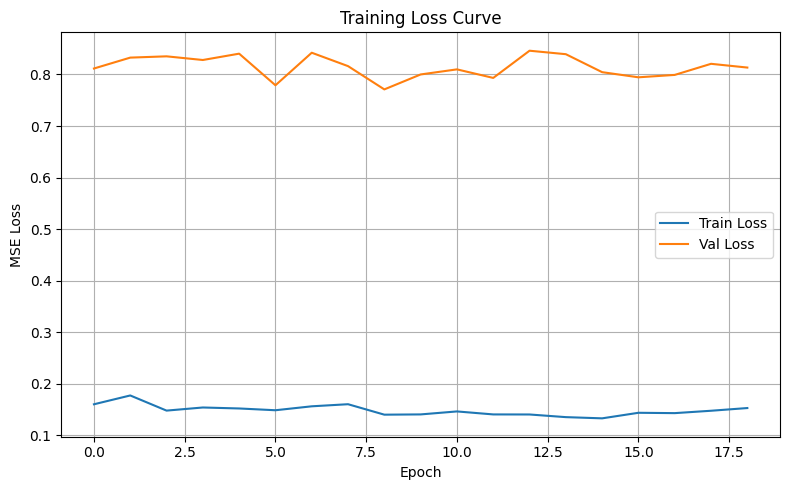

In [36]:
import matplotlib.pyplot as plt
# plt.plot(torch.tensor(lossi).view(-1, 20).mean(1))
plt.figure(figsize=(8, 5))
# plt.plot(range(1, num_epochs + 1), lossi, marker='o', label='Train Loss')
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')

plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Extracting Features: 100%|██████████| 25/25 [00:00<00:00, 2161.25it/s]


Train shape: (3116, 320), (3116,)
Test shape: (779, 320), (779,)
10
20
30
40
50
60
70
80
90
100


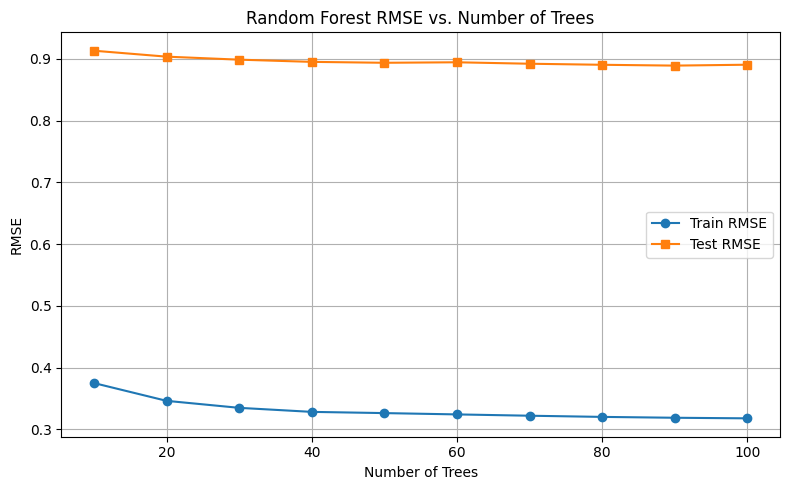

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from tqdm import tqdm

# Flatten PyTorch DataLoaders to numpy arrays
def dataloader_to_numpy(loader):
    X, y = [], []
    for embeddings, labels in tqdm(loader, desc="Extracting Features"):
        X.append(embeddings.cpu().numpy())
        y.append(labels.cpu().numpy())
    return np.vstack(X), np.hstack(y)

X_train, y_train = dataloader_to_numpy(train_loader)
X_test, y_test = dataloader_to_numpy(test_loader)

print(f"Train shape: {X_train.shape}, {y_train.shape}")
print(f"Test shape: {X_test.shape}, {y_test.shape}")
n_trees = 100
tree_steps = list(range(10, n_trees + 1, 10))

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1  # use all CPU cores
)

train_rmse_list = []
test_rmse_list = []

for n in tree_steps:
    print(n)
    rf.set_params(n_estimators=n)
    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    train_rmse =  np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))


    train_rmse_list.append(train_rmse)
    test_rmse_list.append(test_rmse)

# Plot RMSE vs. number of trees
plt.figure(figsize=(8, 5))
plt.plot(tree_steps, train_rmse_list, marker='o', label="Train RMSE")
plt.plot(tree_steps, test_rmse_list, marker='s', label="Test RMSE")
plt.xlabel("Number of Trees")
plt.ylabel("RMSE")
plt.title("Random Forest RMSE vs. Number of Trees")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()